In [2]:
# Importing package#

# Packages for analysis     
import pandas as pd
import numpy as np
from sklearn import svm

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline


In [3]:
#Importing Data#

# Read in muffin and cupcake ingredient data
recipes = pd.read_csv("C:/Jasbir/ML doc/SVM/Recipes_muffin_cupcake.csv")
recipes

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


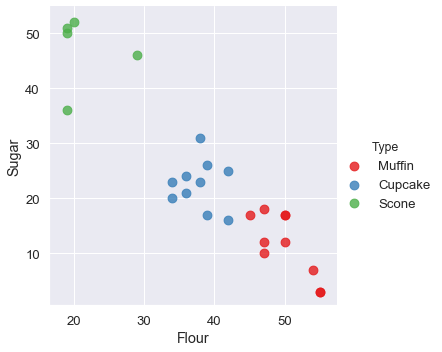

In [4]:
#Preparing the data#

# Plot two ingredients
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 78});

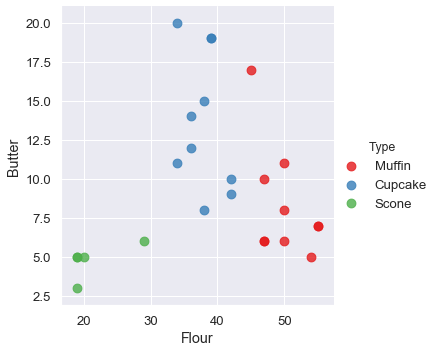

In [5]:
# Plot two ingredients
sns.lmplot('Flour', 'Butter', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 78});

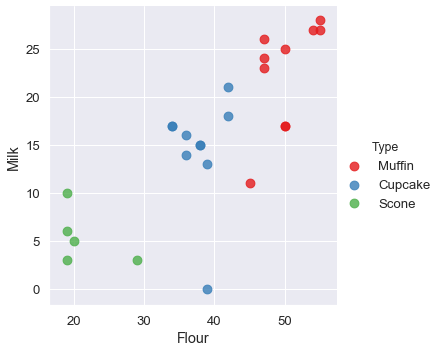

In [6]:
# Plot two ingredients
sns.lmplot('Flour', 'Milk', data=recipes, hue='Type',
           palette='Set1', fit_reg=False, scatter_kws={"s": 78});

In [7]:
# Specify inputs for the model
# ingredients = recipes[['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']].as_matrix()
ingredients = recipes[['Flour','Sugar','Butter','Egg']].as_matrix()
type_label = np.where(recipes['Type']=='Muffin', 0, 1)

# Feature names
recipe_features = recipes.columns.values[1:].tolist()
recipe_features

C:\Users\jasbsing\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

In [9]:
type_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [10]:
ingredients

array([[55,  3,  7,  5],
       [47, 12,  6,  9],
       [47, 18,  6,  4],
       [45, 17, 17,  8],
       [50, 12,  6,  5],
       [55,  3,  7,  5],
       [54,  7,  5,  5],
       [47, 10, 10,  4],
       [50, 17,  8,  6],
       [50, 17, 11,  4],
       [39, 26, 19, 14],
       [42, 16, 10,  8],
       [34, 20, 20,  5],
       [39, 17, 19, 10],
       [38, 23, 15,  8],
       [42, 25,  9,  5],
       [36, 21, 14, 11],
       [38, 31,  8,  6],
       [36, 24, 12,  9],
       [34, 23, 11, 13],
       [29, 46,  6,  0],
       [19, 36,  3, 14],
       [20, 52,  5, 10],
       [19, 50,  5,  6],
       [19, 51,  5,  0]], dtype=int64)

In [11]:
#Fit the Model#

# Fitting the SVM model
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(type_label, model.predict(ingredients))

array([[10,  0],
       [ 0, 15]], dtype=int64)

In [23]:
from sklearn.model_selection import cross_val_score
score_svc = cross_val_score(model, ingredients, type_label, cv=4)
print("Cross Validation score : " + str(score_svc))
print("Cross Validation Mean score : " + str(score_svc.mean()))

Cross Validation score : [0.71428571 0.85714286 1.         1.        ]
Cross Validation Mean score : 0.8928571428571428


In [24]:
# Create a function to guess when a recipe is a muffin or a cupcake
def muffin_or_cupcake(flour, sugar, butter, egg):
    if(model.predict([[flour, sugar,butter,egg]]))==0:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')

In [25]:
# Predict if 50 parts flour and 20 parts sugar
muffin_or_cupcake(90, 92, 80, 80)

You're looking at a muffin recipe!


In [26]:
# Predict if 40 parts flour and 20 parts sugar
muffin_or_cupcake(40,20,90,100)

You're looking at a muffin recipe!


In [34]:
# Predict if 10 parts flour and 10 parts sugar
muffin_or_cupcake(10,10,90,100)

You're looking at a cupcake recipe!
